# This Analysis will be divided into 4 major parts 

## 1. Sales Performance
## 2. Customer Behaviour
## 3. Product Performance
## 4. Seller Effectiveness

### SQL Connection

In [1]:
import pandas as pd
from sqlalchemy import create_engine

username = "postgres"
password = "Vansh7206"
host = "localhost"
port = "5432"
database = "ecommerce_analysis"

engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

print("Connection Successful!")

Connection Successful!


### 1. Sales Performance

#### a. Monthly Revenue Analysis

In [2]:
query = "SELECT DATE_TRUNC('month',order_purchase_timestamp) AS ORDER_MONTH,SUM(oi.price + oi.freight_value) AS TOTAL_REVENUE FROM ORDERS O JOIN ORDER_ITEMS OI ON O.ORDER_ID = OI.ORDER_ID GROUP BY ORDER_MONTH ORDER BY ORDER_MONTH;"
monthly_analysis = pd.read_sql(query, engine)
monthly_analysis

,order_month,total_revenue
0,2016-09-01,354.75
1,2016-10-01,56808.84
2,2016-12-01,19.62
3,2017-01-01,137188.49
4,2017-02-01,286280.62
5,2017-03-01,432048.59
6,2017-04-01,412422.24
7,2017-05-01,586190.95
8,2017-06-01,502963.04
9,2017-07-01,584971.62


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

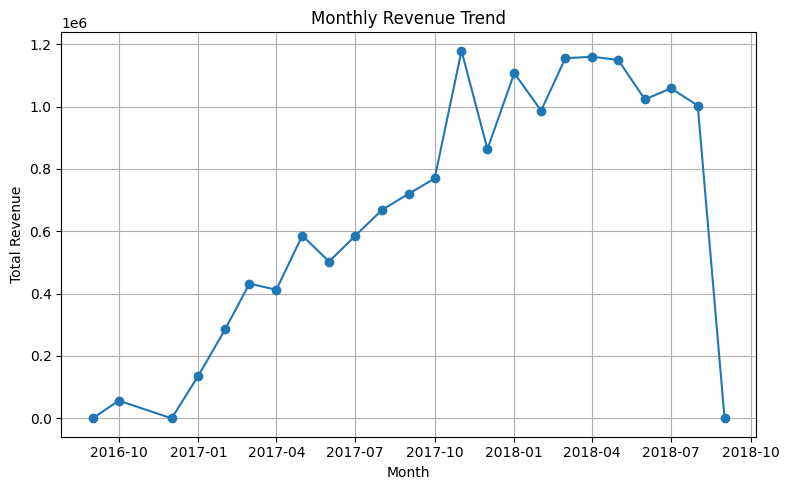

In [4]:
plt.figure(figsize=(8,5))
plt.plot(monthly_analysis['order_month'],monthly_analysis['total_revenue'],marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### b. Yearly Revenue Analysis

In [5]:
query = "SELECT DATE_TRUNC('year',order_purchase_timestamp) AS ORDER_MONTH,SUM(oi.price + oi.freight_value) AS TOTAL_REVENUE FROM ORDERS O JOIN ORDER_ITEMS OI ON O.ORDER_ID = OI.ORDER_ID GROUP BY ORDER_MONTH ORDER BY ORDER_MONTH;"
year_analysis = pd.read_sql(query, engine)
year_analysis

,order_month,total_revenue
0,2016-01-01,57183.21
1,2017-01-01,7142672.43
2,2018-01-01,8643697.60


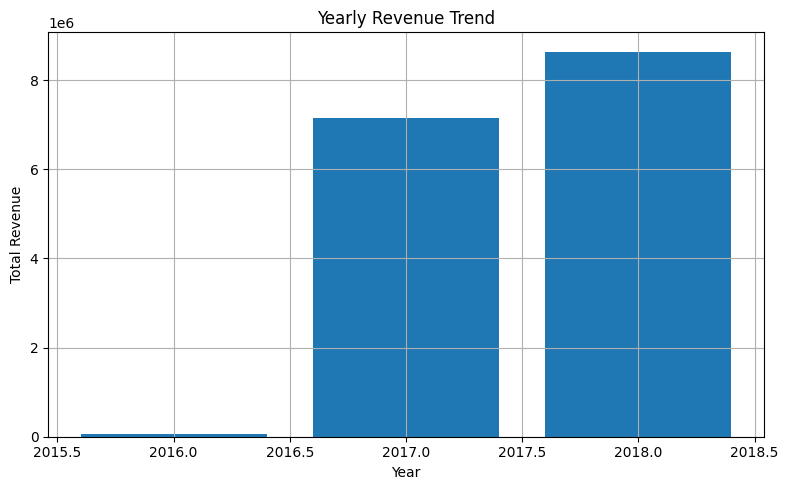

In [6]:
plt.figure(figsize=(8,5))
plt.bar(year_analysis['order_month'].dt.year,year_analysis['total_revenue'])
plt.title('Yearly Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### c. Sales Performance by State

In [7]:
query = "SELECT c.customer_state ,SUM(oi.price + oi.freight_value) AS Total_revenue FROM orders o JOIN order_items oi ON o.order_id = oi.order_id JOIN customers c ON o.customer_id = c.customer_id GROUP BY c.customer_state ORDER BY total_revenue DESC;"
state_sales = pd.read_sql(query,engine)
state_sales

,customer_state,total_revenue
0,SP,5921678.12
1,RJ,2129681.98
2,MG,1856161.49
3,RS,885826.76
4,PR,800935.44
5,BA,611506.67
6,SC,610213.60
7,DF,353229.44
8,GO,347706.93
9,ES,324801.91


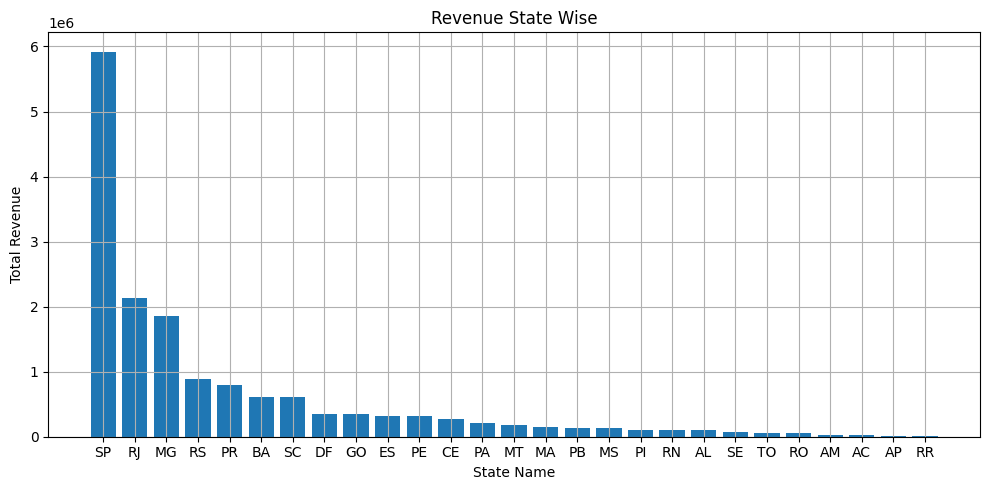

In [8]:
plt.figure(figsize=(10,5))
plt.bar(state_sales['customer_state'],state_sales['total_revenue'])
plt.title('Revenue State Wise')
plt.xlabel('State Name')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### d. Top 10 Products by Revenue

In [9]:
query = "SELECT ct.product_category_name_english, SUM(oi.price + oi.freight_value) as Total_revenue from order_items oi join products p ON oi.product_id = p.product_id join category_translation ct ON p.product_category_name = ct.product_category_name GROUP BY ct.product_category_name_english ORDER BY total_revenue DESC LIMIT 10; ;"
products = pd.read_sql(query,engine)
products

,product_category_name_english,total_revenue
0,health_beauty,1441248.07
1,watches_gifts,1305541.61
2,bed_bath_table,1241681.72
3,sports_leisure,1156656.48
4,computers_accessories,1059272.40
5,furniture_decor,902511.79
6,housewares,778397.77
7,cool_stuff,719329.95
8,auto,685384.32
9,garden_tools,584219.21


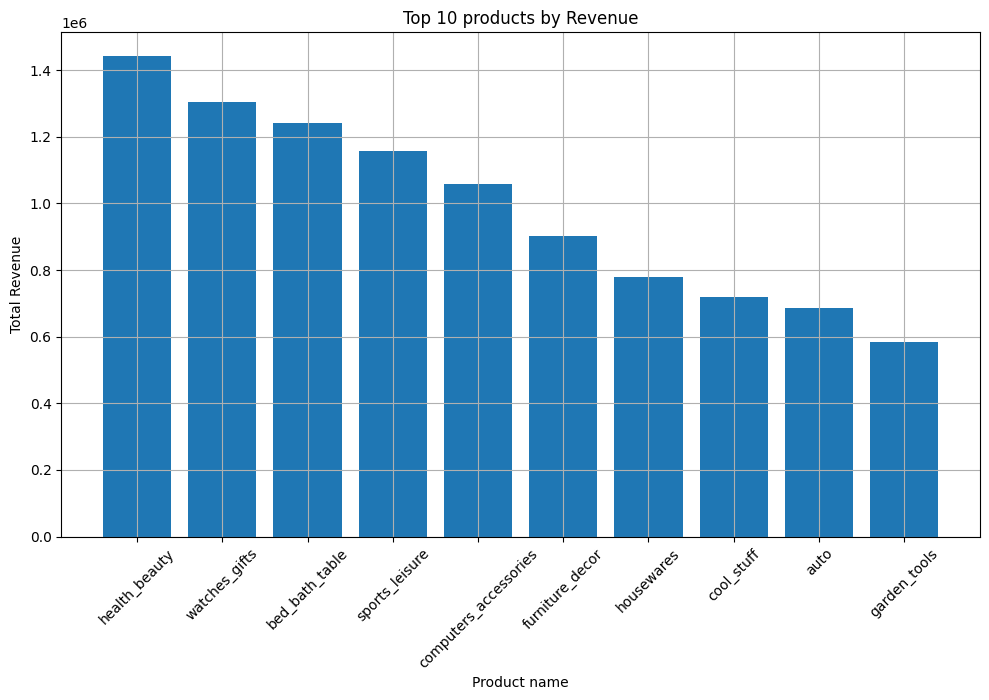

In [10]:
plt.figure(figsize=(10,6))
plt.bar(products['product_category_name_english'],products['total_revenue'])
plt.title('Top 10 products by Revenue')
plt.xlabel('Product name')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Customer Behaviour

#### a. RFM Analysis

In [11]:
query = "SELECT c.customer_unique_id, o.order_id, o.order_purchase_timestamp, SUM(oi.price + oi.freight_value) as Total_Revenue FROM order_items oi JOIN orders o ON oi.order_id = o.order_id JOIN customers c ON c.customer_id = o.customer_id group by c.customer_unique_id, o.order_id, o.order_purchase_timestamp ;"
rfm_table = pd.read_sql(query,engine)
rfm_table

,customer_unique_id,order_id,order_purchase_timestamp,total_revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,27.19
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,43.62
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,196.89
...,...,...,...,...
98661,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2067.42
98662,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,84.58
98663,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,112.46
98664,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,133.69


In [12]:
rfm_table['order_purchase_timestamp'] = pd.to_datetime(rfm_table['order_purchase_timestamp'])
reference_date = rfm_table['order_purchase_timestamp'].max()
reference_date                  #This is Last Date of Data

Timestamp('2018-09-03 09:06:57')

In [13]:
rfm_table = rfm_table.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": "max",   # last purchase
    "order_id": "count",                 # frequency
    "total_revenue": "sum"                   # monetary
}).reset_index()
rfm_table

,customer_unique_id,order_purchase_timestamp,order_id,total_revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,2067.42
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,84.58
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,112.46
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,133.69


In [14]:
rfm_table.rename(columns={
    "order_purchase_timestamp": "last_purchase_date",
    "order_id": "frequency",
    "total_revenue": "monetary"
}, inplace=True)

In [15]:
rfm_table["recency"] = (reference_date - rfm_table["last_purchase_date"]).dt.days

In [16]:
rfm_table = rfm_table[["customer_unique_id","recency","frequency","monetary"]]
rfm_table

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69


### Segmentation Based on RFM

In [17]:
rfm_table["R_score"] = pd.qcut(rfm_table["recency"],4,labels=[4,3,2,1])
rfm_table

,customer_unique_id,recency,frequency,monetary,R_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,1
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69,3


In [18]:
rfm_table["F_score"] = pd.qcut(rfm_table["frequency"].rank(method="first"),4,labels=[1,2,3,4])
rfm_table

,customer_unique_id,recency,frequency,monetary,R_score,F_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4,1
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1
...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,1,4
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2,4
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1,4
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69,3,4


In [19]:
rfm_table["M_score"] = pd.qcut(rfm_table["monetary"],4,labels=[1,2,3,4])
rfm_table

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1,4
...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,1,4,4
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2,4,2
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1,4,3
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69,3,4,3


In [20]:
rfm_table["R_score"] = rfm_table["R_score"].astype(int)
rfm_table["F_score"] = rfm_table["F_score"].astype(int)
rfm_table["M_score"] = rfm_table["M_score"].astype(int)

In [21]:
rfm_table["RFM_score"] = (rfm_table["R_score"].astype(str) +rfm_table["F_score"].astype(str) +rfm_table["M_score"].astype(str))
rfm_table

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,1,4,4,144
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2,4,2,242
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1,4,3,143
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69,3,4,3,343


In [22]:
def segment_customer(row):
    if row["R_score"] == 4 and row["F_score"] == 4:
        return "Champion"
    elif row["F_score"] >= 3:
        return "Loyal"
    elif row["R_score"] == 1:
        return "Lost"
    else:
        return "Regular"

rfm_table["segment"] = rfm_table.apply(segment_customer, axis=1)

In [23]:
rfm_table["segment"].value_counts()

segment
Loyal       41635
Regular     35686
Lost        12024
Champion     6075
Name: count, dtype: int64

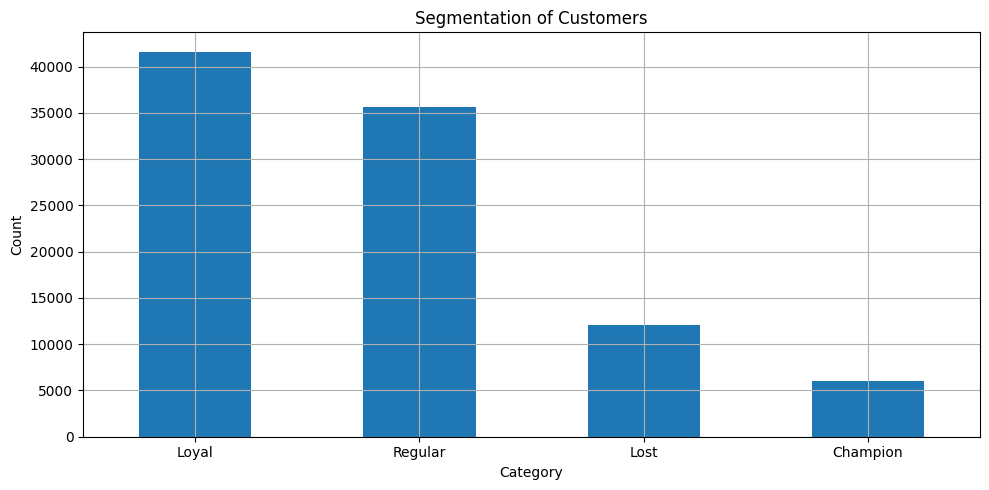

In [24]:
count_seg = rfm_table["segment"].value_counts()
plt.figure(figsize=(10,5))
count_seg.plot(kind='bar')
plt.title('Segmentation of Customers')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

#### b. Revenue by Segment

In [25]:
segment_revenue = rfm_table.groupby("segment").agg(total_revenue=("monetary","sum"),avg_revenue=("monetary","mean"),customer_count=("monetary", "count")).reset_index()
segment_revenue

,segment,total_revenue,avg_revenue,customer_count
0,Champion,1137634.01,187.264858,6075
1,Lost,1945172.24,161.774138,12024
2,Loyal,6997127.04,168.058774,41635
3,Regular,5763619.95,161.509274,35686


In [26]:
segment_revenue["revenue_share_%"] = (segment_revenue["total_revenue"] /segment_revenue["total_revenue"].sum()) * 100
segment_revenue.sort_values(by="total_revenue", ascending=False)

,segment,total_revenue,avg_revenue,customer_count,revenue_share_%
2,Loyal,6997127.04,168.058774,41635,44.163875
3,Regular,5763619.95,161.509274,35686,36.378329
1,Lost,1945172.24,161.774138,12024,12.277374
0,Champion,1137634.01,187.264858,6075,7.180422


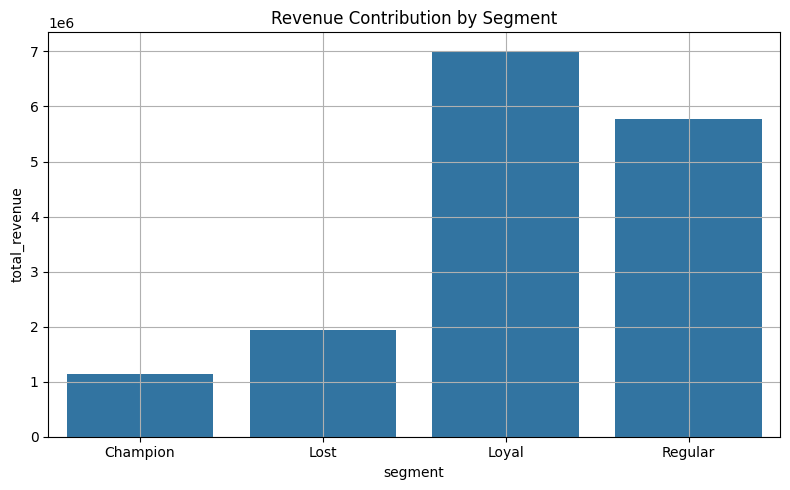

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=segment_revenue, x="segment", y="total_revenue")
plt.title("Revenue Contribution by Segment")
plt.grid(True)
plt.tight_layout()
plt.show()

#### c. Frequency & Monetary Distribution through Histogram

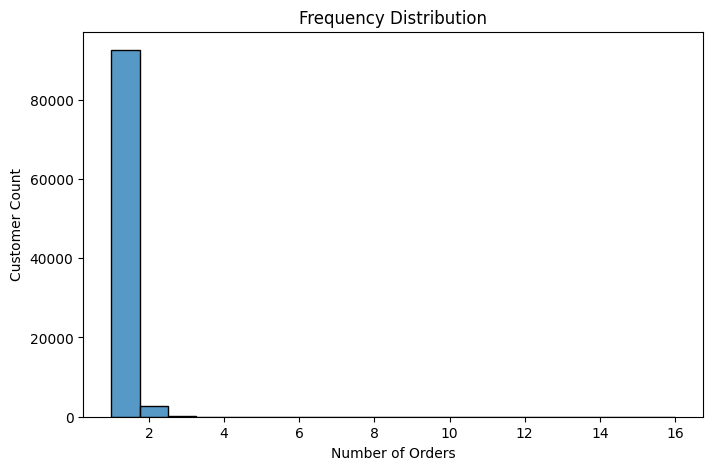

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(rfm_table["frequency"], bins=20)
plt.title("Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Count")
plt.show()

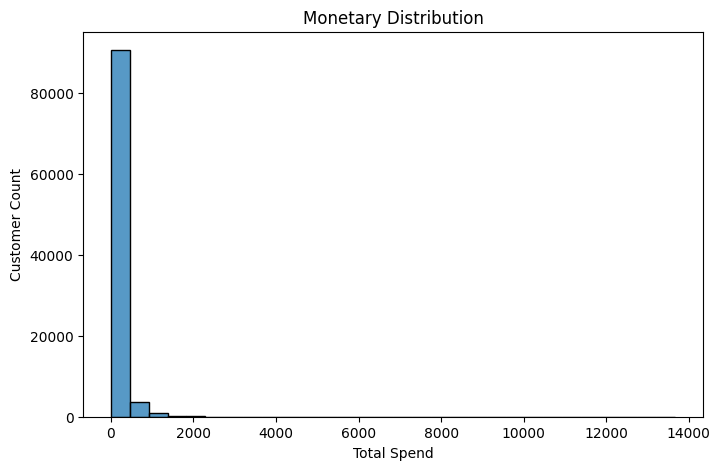

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(rfm_table["monetary"], bins=30)
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customer Count")
plt.show()

#### d. Payment Method Analysis

In [30]:
query = "SELECT PAYMENT_TYPE,COUNT(*) FROM ORDER_PAYMENTS GROUP BY PAYMENT_TYPE ORDER BY COUNT DESC ;"
payment = pd.read_sql(query,engine)
payment

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


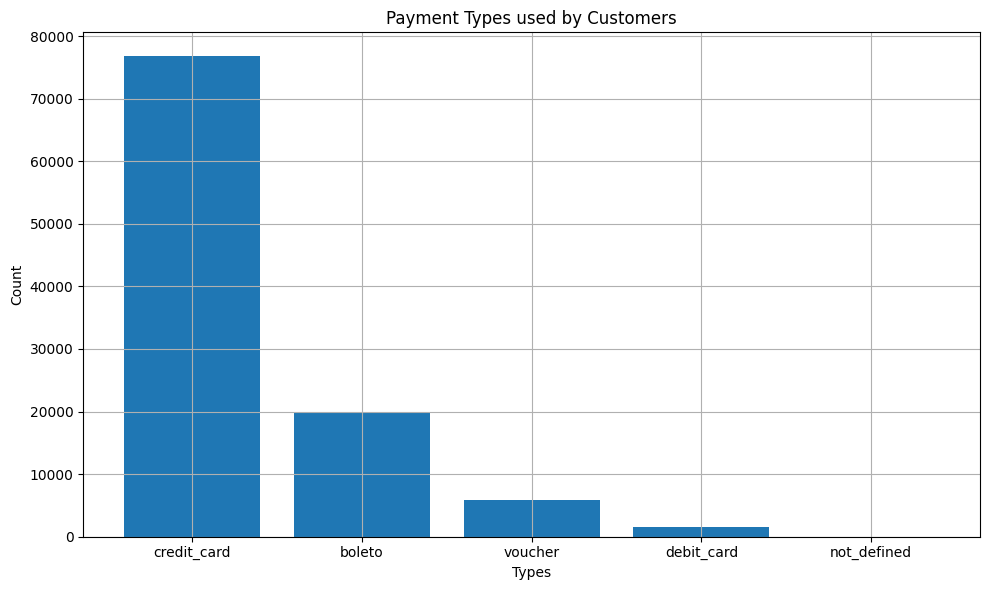

In [31]:
plt.figure(figsize=(10,6))
plt.bar(payment['payment_type'],payment['count'])
plt.title('Payment Types used by Customers')
plt.xlabel('Types')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#### e. Distribution of Payments by Installment Range

In [32]:
query = """
SELECT 
    CASE 
        WHEN payment_installments BETWEEN 1 AND 4 THEN '1-4'
        WHEN payment_installments BETWEEN 5 AND 8 THEN '5-8'
        WHEN payment_installments BETWEEN 9 AND 12 THEN '9-12'
        ELSE '13+'
    END AS installment_group,
    COUNT(*) AS total_payments
FROM order_payments
GROUP BY installment_group
ORDER BY installment_group;;
"""

installments = pd.read_sql(query, engine)
installments

,installment_group,total_payments
0,1-4,82518
1,13+,187
2,5-8,15053
3,9-12,6128


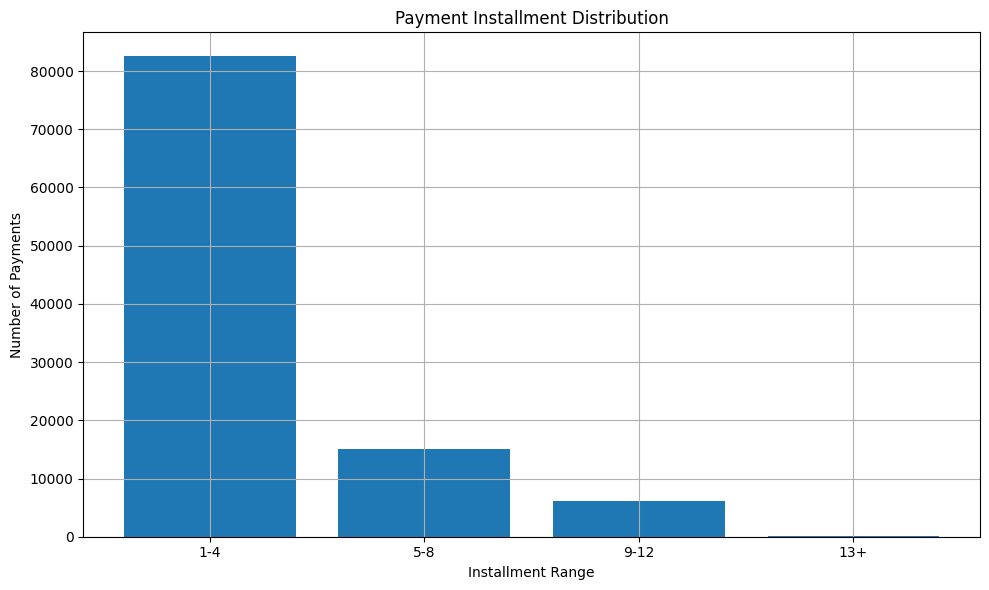

In [33]:
installments['installment_group'] = pd.Categorical(installments['installment_group'],categories=['1-4', '5-8', '9-12', '13+'],ordered=True)
installments = installments.sort_values('installment_group')

plt.figure(figsize=(10,6))
plt.bar(installments['installment_group'],installments['total_payments'])
plt.title("Payment Installment Distribution")
plt.xlabel("Installment Range")
plt.ylabel("Number of Payments")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Product Performance

#### a. Top 10 Products Sold Quantity wise

In [42]:
query = """SELECT  ct.product_category_name_english AS category_english, COUNT(*) AS total_products FROM products p JOIN category_translation ct
ON p.product_category_name = ct.product_category_name GROUP BY ct.product_category_name_english ORDER BY total_products DESC LIMIT 10;"""
pp = pd.read_sql(query,engine)
pp

,category_english,total_products
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


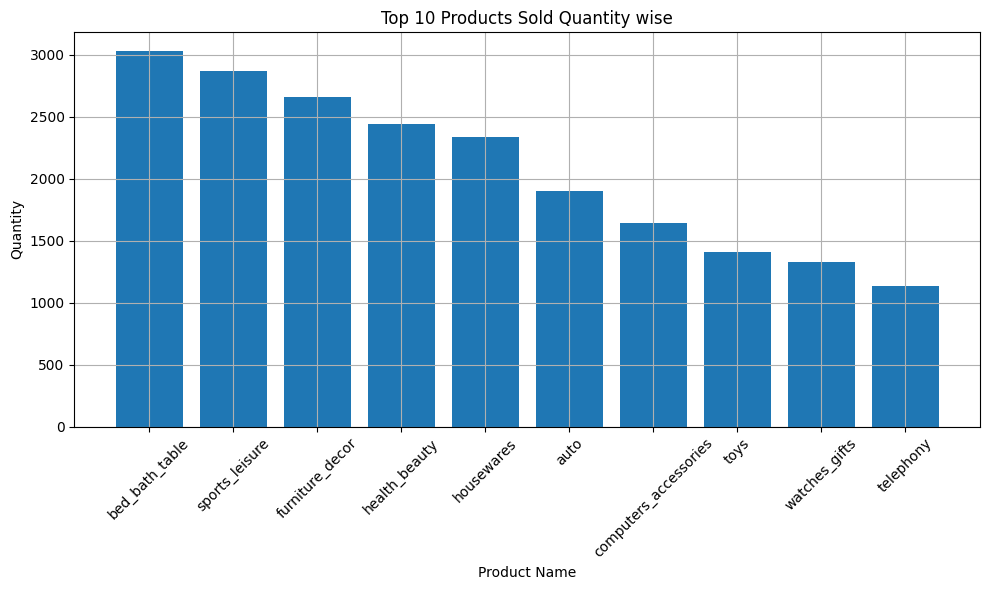

In [48]:
plt.figure(figsize=(10,6))
plt.bar(pp['category_english'],pp['total_products'])
plt.title('Top 10 Products Sold Quantity wise')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Seller Effectiveness

#### a. Top 10 Sellers by City

In [52]:
query = "SELECT seller_city,COUNT(*) AS TOP_SELLER_CITY FROM SELLERS GROUP BY SELLER_CITY order by top_seller_city desc limit 10 ;"
se = pd.read_sql(query,engine)
se

,seller_city,top_seller_city
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


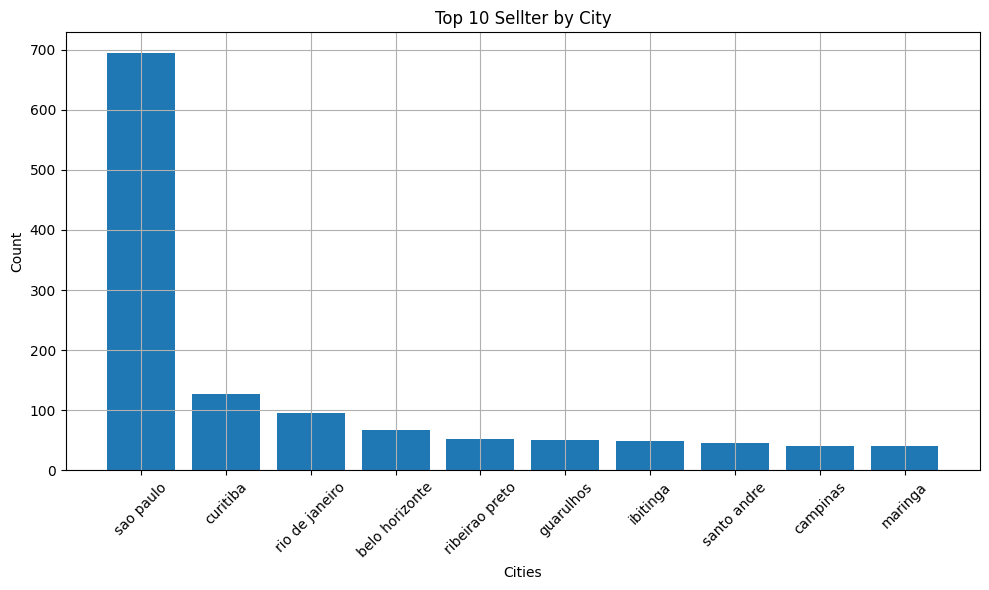

In [53]:
plt.figure(figsize=(10,6))
plt.bar(se['seller_city'],se['top_seller_city'])
plt.title('Top 10 Sellter by City')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### b. Delivery Time Analysis

In [57]:
query = """SELECT CASE 
        WHEN (order_delivered_customer_date - order_purchase_timestamp) 
             BETWEEN INTERVAL '1 day' AND INTERVAL '4 days' THEN '1-4 days'

        WHEN (order_delivered_customer_date - order_purchase_timestamp) 
             BETWEEN INTERVAL '5 days' AND INTERVAL '8 days' THEN '5-8 days'

        WHEN (order_delivered_customer_date - order_purchase_timestamp) 
             BETWEEN INTERVAL '9 days' AND INTERVAL '12 days' THEN '9-12 days'

        ELSE '12+ days'
    END AS delivery_bucket,
    COUNT(*) AS total_orders
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY delivery_bucket
ORDER BY delivery_bucket;
""";
dil_time = pd.read_sql(query,engine)
dil_time

,delivery_bucket,total_orders
0,1-4 days,8589
1,12+ days,50850
2,5-8 days,20268
3,9-12 days,16769


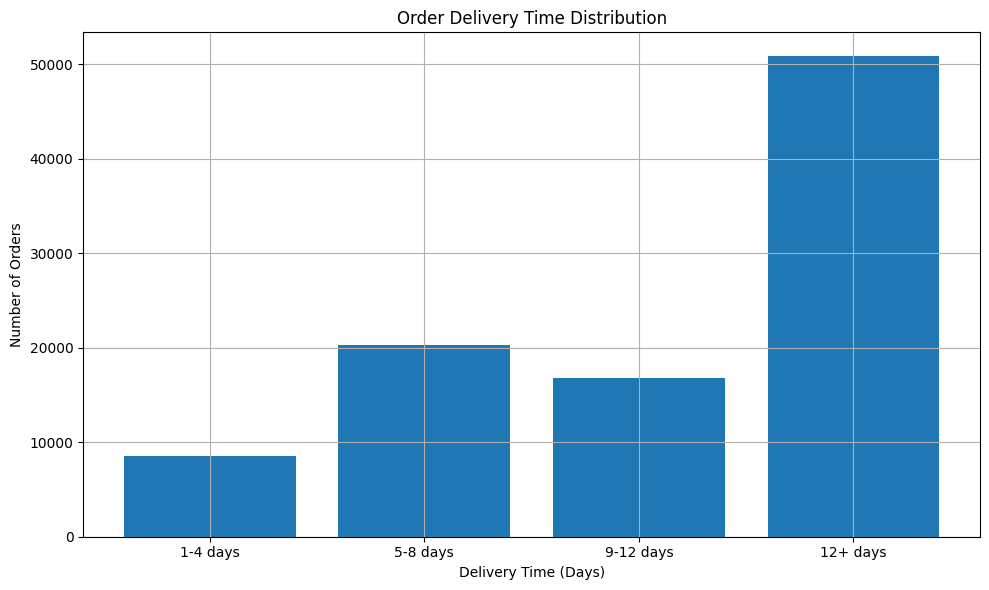

In [61]:
order = ['1-4 days', '5-8 days', '9-12 days', '12+ days']
dil_time['delivery_bucket'] = pd.Categorical(dil_time['delivery_bucket'],categories=order,ordered=True)
dil_time = dil_time.sort_values('delivery_bucket')

plt.figure(figsize=(10,6))
plt.bar(dil_time['delivery_bucket'], dil_time['total_orders'])
plt.title("Order Delivery Time Distribution")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


## HeatMap for Following

In [62]:
rfm_heatmap = rfm_table.pivot_table(index="R_score",columns="F_score",values="customer_unique_id",aggfunc="count")

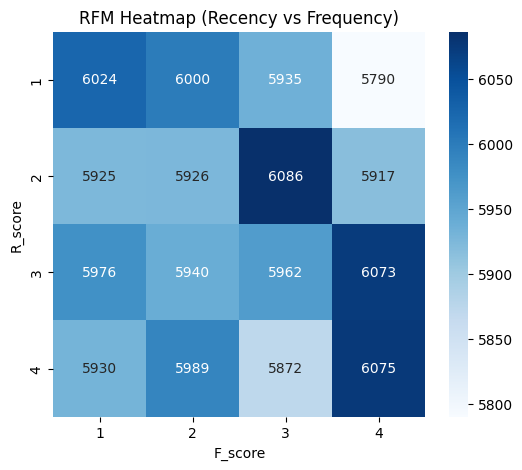

In [63]:
plt.figure(figsize=(6,5))
sns.heatmap(rfm_heatmap, annot=True, fmt="d", cmap="Blues")
plt.title("RFM Heatmap (Recency vs Frequency)")
plt.show()